#Co-authorship network analysis

Requirements for Google Colab

In [2]:
!pip install python-igraph
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install cairocffi
!pip uninstall pycairo

     |████████████████████████████████| 3.2MB 906kB/s 
You should consider upgrading via the 'pip install --upgrade pip' command.
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
     |████████████████████████████████| 71kB 1.0MB/s 
     |████████████████████████████████| 409kB 1.5MB/s 
     |████████████████████████████████| 112kB 3.0MB/s 
  Running setup.py install for cairocffi ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import pickle
import math
import igraph
import pandas as pd
import numpy as np
from igraph import *
import matplotlib.pyplot as plt
import time
import cairocffi as cairo
# from google.colab import files
from IPython.display import SVG, display, Image

In [6]:
def load_obj(name):
    with open('data/obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

def save_obj(obj, name):
    with open('data/obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

g = load_obj("graph")

Nodes and links

In [14]:
N = len(g.vs)
L = len(g.es)

print(''.join([str(N), " nodes"]))
print(''.join([str(L), " links"]))

373263 nodes
4511734 links


## Degree distribution analysis

Checking coherence between grade and links

In [8]:
L == sum(g.degree())/2

True

Average degree

In [9]:
avg_degree = (2*L)/N
avg_degree

24.17455788545878

Maximum degree

In [10]:
degrees = g.degree()
max(degrees)

5134

### Plotting distribution

In [11]:
degrees = g.degree()
max_degree = max(degrees)
k = list(range(max_degree + 1)) # k = [0, ..., max_degree]

p = np.zeros(max_degree + 1)

# Occurrencies per degree
for degree in degrees:
  p[degree] += 1

p = list(p)
tot = sum(p)
p = [i/tot for i in p]

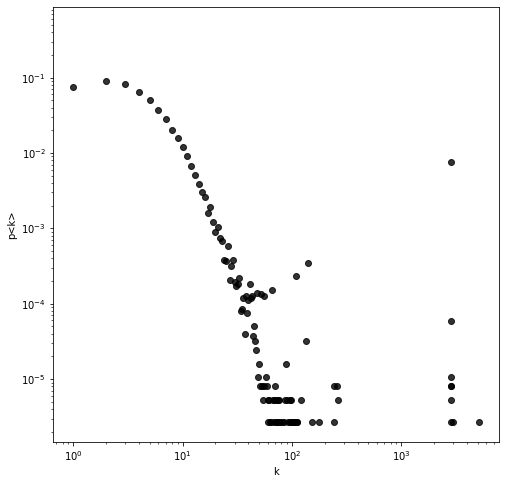

In [13]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.plot(k, p, 'o', c='black', alpha=0.8)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('k')
ax.set_ylabel('p<k>')
fig.show()
fig.savefig('plots/degreeDistribution.png')

Is the network sparse? (Links = 4511734)

In [15]:
L/(N*(N-1)/2)

6.476565491654329e-05

## Connected components analysis

In [16]:
components = g.clusters(mode="weak")

In [17]:
max_cluster_size = max(components.sizes())
max_cluster_size

31198

### Plotting biggest connected component distribution

In [18]:
import numpy as np
sizes = components.sizes()
p = np.zeros(max_cluster_size + 1) # k = [0, ..., max_cluster_size]

k = list(range(max(sizes) + 1))
# Dimension per cluster size
for size in sizes:
  p[size] += 1

# List
dimension_per_size = list(p)
tot = sum(p)

# Probability
p = [i/tot for i in dimension_per_size]

# Counting total nodes per cluster size
nnodes = 0
for size in range(len(dimension_per_size)):
  nnodes = nnodes + size*dimension_per_size[size]

# Checking total nodes
nnodes == N

True

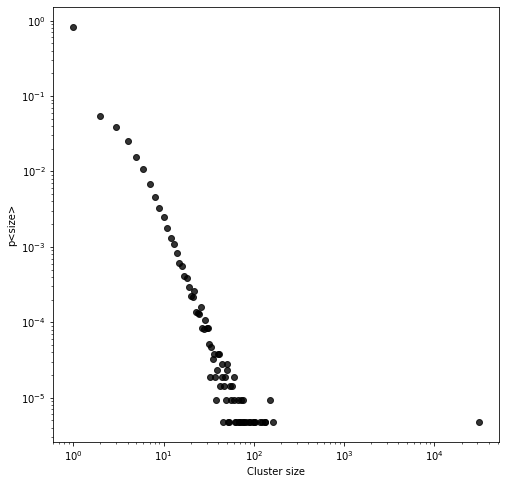

In [19]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.plot(k, p, 'o', c='black', alpha=0.8)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Cluster size')
ax.set_ylabel('p<size>')
fig.show()
fig.savefig('plots/componentDistribution.png')

### Analysing the biggest connected component
In the next chinks we analyse the cluster made up of max_cluster_size = 31198 nodes

In [20]:
biggerClusterIndex = -1
for i in range(len(sizes)):
  if sizes[i] == max_cluster_size:
    biggerClusterIndex = i
biggerClusterIndex

22

Getting subgraph

In [21]:
biggerSubG = components.subgraph(biggerClusterIndex)

Distribution

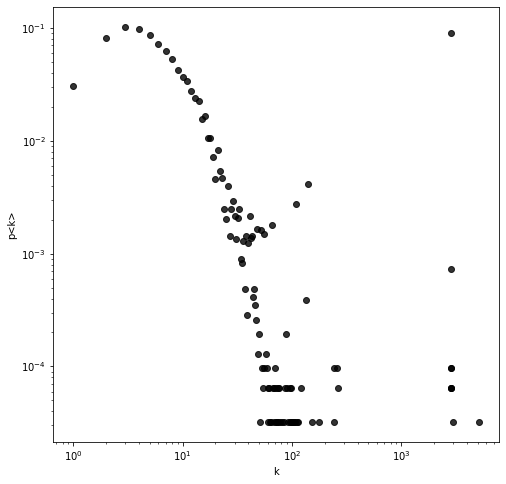

In [22]:
degrees = biggerSubG.degree()
max_degree = max(degrees)
k = list(range(max_degree + 1)) # k = [0, ..., max_degree]

p = np.zeros(max_degree + 1)

# Occurrencies per degree
for degree in degrees:
  p[degree] += 1

p = list(p)
tot = sum(p)
p = [i/tot for i in p]

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
ax.plot(k, p, 'o', c='black', alpha=0.8)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('k')
ax.set_ylabel('p<k>')
fig.show()
fig.savefig('plots/subGraphDegreeDistribution.png')

Maximum degree

In [23]:
degrees = biggerSubG.degree()
max(degrees)

5136

Organizations

In [24]:
orgs = [i[0] for i in biggerSubG.vs["orgs"] if len(i) > 0 and i[0] != '']
len(orgs)

9890

In [25]:
orgs[:15]

['Department of Computer Science,University of Illinois at Chicago',
 'Department of Electrical and Computer Engineering, University of Manitoba',
 'Department of Electrical and   Computer Engineering,University of Alberta',
 'Department of Computing Science\nAlgorithmic Systems \nUtrecht University',
 'Algorithms Research Group in Bergen,\nDepartment of Informatics, University of Bergen',
 'Department of Mathematics, National and Kapodistrian University of Athens',
 'Max-Planck-Institut für Informatik, Saarbrücken, Germany',
 'Rachel and Selim Benin School of Computer Science and Engineering Hebrew University of Jerusalem',
 'Faculty of Computer Science,Free University of Bozen-Bolzano',
 'Free University of Bozen-Bolzano',
 'Wireless Foundations Center,\n\nDepartment of Electrical Engineering and Computer Sciences,\n\nUniversity of California - Berkeley',
 'Department of  Computer Science,Carnegie Mellon University',
 'Rutgers University.',
 'Department of Computer ScienceLevine Scie

Considerare i nodi in ordine di publications, citazioni o h-index e vedere quanti di questi hanno organization. <br />
Vedere correlazione tra degree e h-index e tra degree e n publications <br />
Confrontare il sottografo con il grafo e decidere se studiare solo quello <br />
Ottenere coordinate organizazzioni se punto 1 è positivo

Tags

In [26]:
biggerSubG.vs["tags.t"][:15]

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

## Path analysis
In the next chunks, we analyse the diameter and the average path length of the previous connected component.

Diameter

In [27]:
d = biggerSubG.get_diameter()
len(d)

50

Average path length

In [28]:
avg_p = biggerSubG.average_path_length()
avg_p

11.324170509383672

## Diameter, path length and degree per component

In [29]:
avg_degrees = []
max_degrees = []
diameters = []
avg_path_length = []

start = time.time()
i = 0
while(i < len(components)):
  if(i != 22): # if the component is not the 22nd, i.e. the biggest one
    subG = components.subgraph(i)
    degrees = subG.degree() # getting degrees
    max_degrees.append(max(degrees)) # storing max degree
    avg_degrees.append(sum(degrees)/len(degrees)) # storing avg degree
    avg_path_length.append(subG.average_path_length()) # storing avg path length
    #diameters.append(biggerSubG.get_diameter()) # storing diameter
  i += 1
end = time.time()

end-start

3932.3418300151825

Avg degrees

In [30]:
print(sum(avg_degrees)/len(avg_degrees))
print(max(avg_degrees))

0.48246663281707014
29.0


Max degrees

In [31]:
print(sum(max_degrees)/len(max_degrees))
print(max(max_degrees))

0.5732064490610815
66


Average path length

In [32]:
import math
avg_path_length = [i for i in avg_path_length if not math.isnan(i)]

In [33]:
print(max(avg_path_length))
print(sum(avg_path_length)/len(avg_path_length))

6.988780939162618
1.0824526173682065


Boxplotting

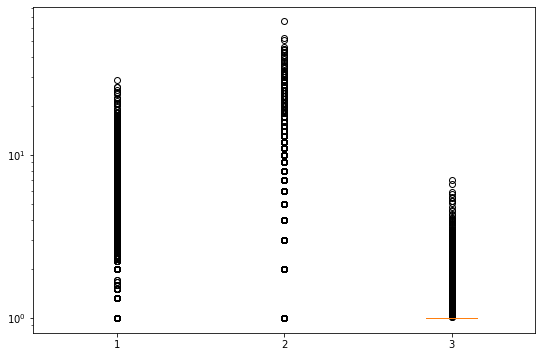

In [34]:
## numpy is used for creating fake data
import numpy as np 
import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 

## combine these different collections into a list    
data_to_plot = [avg_degrees, max_degrees, avg_path_length]

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)
ax.set_yscale('log')

# Save the figure
fig.savefig('plot/fig1.png', bbox_inches='tight')

## Clustering Coefficient, Density analysis

#### Clustering *coefficient*

Bigger subgraph

In [35]:
subCentrality = biggerSubG.transitivity_undirected()
subCentrality

0.9987416251590855

All the graph

In [36]:
gCentrality = g.transitivity_undirected()
gCentrality

0.9987218641614894

## Centrality analysis

### Betweenness centrality

In [37]:
betw = biggerSubG.betweenness()

In [38]:
betw[30:50]

[907459.0353334659,
 800754.3220577713,
 187146.0,
 323567.3483238431,
 0.0,
 106864.80586873408,
 0.0,
 0.0,
 436597.0,
 0.0,
 467785.0,
 3264660.0,
 872757.0,
 2334298.5,
 0.0,
 372594.32477763214,
 0.0,
 1264958.3406842581,
 124772.0,
 155960.0]

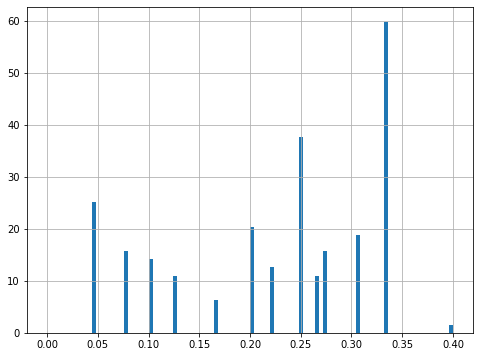

In [39]:
X  = pd.Series([b for b in betw if b != 0])

X.hist(cumulative = False, density=0.1, bins=100, range=[0, 0.4], figsize=(8,6))

plt.show()
#fig.savefig('/content/drive/My Drive/NetworkScience/AcademicGraph/plots/betweennessDistribution.png')

### Closeness centrality

In [40]:
clos = biggerSubG.closeness()

In [41]:
clos[30:50]

[0.07330277191012027,
 0.07074005292408998,
 0.06607797951385654,
 0.06608525818095545,
 0.06607713977082583,
 0.06608273846088669,
 0.06607713977082583,
 0.06195904748664376,
 0.06605139801064545,
 0.06496059303064061,
 0.06947348730316737,
 0.06398780832988067,
 0.06015502979117256,
 0.06016048194722724,
 0.07308587948104035,
 0.07621088014930952,
 0.07308587948104035,
 0.07563092438604573,
 0.05894389588600061,
 0.06263476804837796]

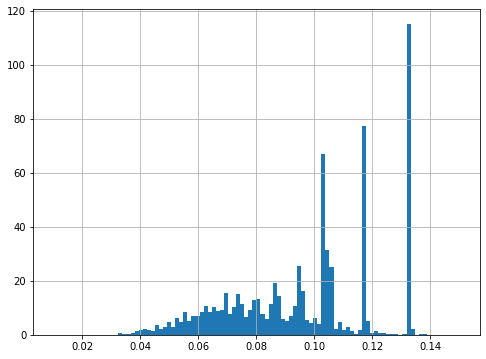

In [42]:
X  = pd.Series([b for b in clos if b != 0])

X.hist(cumulative = False, density=0.1, bins=100, range=[0.01, 0.15], figsize=(8,6))

plt.show()
#fig.savefig('/content/drive/My Drive/NetworkScience/AcademicGraph/plots/betweennessDistribution.png')

### Degree centrality

In [43]:
degr = degrees 

In [44]:
degr[30:50]

[]

### Eigenvector Centrality

In [45]:
eigen = biggerSubG.eigenvector_centrality(directed=False, scale=True, weights=None, return_eigenvalue=False)

In [46]:
eigen[30:50]

[-0.0,
 7.208272170530157e-19,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8020680426325391e-19,
 0.0,
 0.0,
 -0.0,
 0.0,
 1.8020680426325391e-19,
 -0.0,
 1.8020680426325391e-19,
 -0.0]

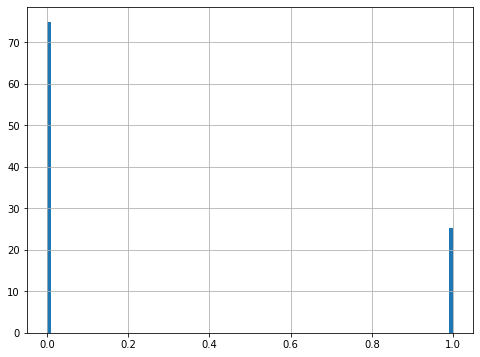

In [47]:
X  = pd.Series([b for b in eigen if b != 0])

X.hist(cumulative = False, density=0.1, bins=100, figsize=(8,6))

plt.show()
#fig.savefig('/content/drive/My Drive/NetworkScience/AcademicGraph/plots/betweennessDistribution.png')